#Grupo 25 - Entregable Aprendizaje No Supervisado


Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset . Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.


**Cargamos las librerias necesarias para realizar el entregable.**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from tqdm import tqdm

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn import metrics

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score

**Cargamos el dataset “players_22.csv”.**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/LuisYurovich/Aprendizaje_No_Supervisado/main/players_22.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

Se puede observar que la variable "player_positions", puede contener más de una entrada y a lo sumo 3. Por ejemplo, en el caso de Messi, tiene tres posiciones diferentes en la cancha. Por ello, optamos por generar tres nuevas variables denominadas 'first_position', 'second_postion', 'third_position', las cuales corresponden a las diferentes entradas que pueda tener cada jugador. Si bien parece que, de esta manera, el orden importara, este orden no fue tenido en cuenta en los análisis. 

In [ ]:
df["player_positions"].str.split()

0        [RW,, ST,, CF]
1                  [ST]
2             [ST,, LW]
3            [LW,, CAM]
4            [CM,, CAM]
              ...      
19234             [CDM]
19235              [CM]
19236              [CM]
19237              [ST]
19238             [CAM]
Name: player_positions, Length: 19239, dtype: object

In [ ]:
df["player_positions"].str.split(expand=True)

,0,1,2
0,"RW,","ST,",CF
1,ST,None,None
2,"ST,",LW,None
3,"LW,",CAM,None
4,"CM,",CAM,None
...,...,...,...
19234,CDM,None,None
19235,CM,None,None
19236,CM,None,None
19237,ST,None,None


In [ ]:
positions = df["player_positions"].str.split(',',expand=True)
positions.columns = ['first_position', 'second_postion', 'third_position']
df = pd.concat([df, positions], axis=1)
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,first_position,second_postion,third_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,RW,ST,CF
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,ST,None,None
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,ST,LW,None
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,

## 1- Análisis exploratorio de la base.

Se observa que, a diferencia del dataset del FIFA 19 presentado en la teoria se agrego una nueva variable "potencial", la cual intuimos que esta correlacionada con la variable "overall".

In [ ]:
skills_ratings = ['pace', 'shooting', 'passing', 'dribbling',
                  'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
                  'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power', 'power_jumping','power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                  'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 
                  'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [ ]:
df_corr=df[["overall","potential"]]
df_corr.corr()

,overall,potential
overall,1.000000,0.644275
potential,0.644275,1.000000


El dataset cuenta con un total de 113 variables.

In [ ]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url',
       'nation_logo_url', 'nation_flag_url', 'first_position',
       'second_postion', 'third_position'],
      dtype='object', length=113)
113 variables


In [ ]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

In [ ]:
df.club_position.unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

Abreviatura (INGLES)	Posición

Arquero:
	
  * GK	Portero

Defensores:

  * RWB	Carrilero Derecho
  * RB	Lateral Derecho
  * CB	Defensa Central
  * LF	Lateral Izquierdo
  * LWB	Carrilero Izquierdo
  
Mediocampistas: 

  * CDM	Medio Centro Defensivo
  * RM	Medio Derecho
  * CM	Medio Centro
  * LM	Medio Izquierdo
  * CAM	Medio Centro Ofensivo

Delanteros:   
  * RF	Segundo Delantero Derecho
  * CF	Media Punta
  * LF	Segundo Delantero Izquierdo
  * RW	Extremo Derecho
  * ST	Delantero Centro
  * LW	Extremo Izquierdo

In [ ]:
df[['player_positions','club_position','nation_position']]

,player_positions,club_position,nation_position
0,"RW, ST, CF",RW,RW
1,ST,ST,RS
2,"ST, LW",ST,ST
3,"LW, CAM",LW,NaN
4,"CM, CAM",RCM,RCM
...,...,...,...
19234,CDM,SUB,NaN
19235,CM,RES,NaN
19236,CM,RES,NaN
19237,ST,RES,NaN


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

47


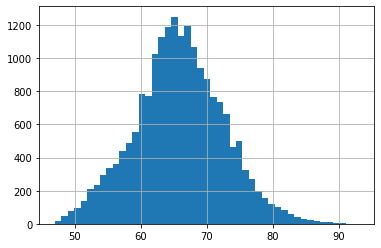

In [ ]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

In [ ]:
df['overall'].mean()

65.77218150631529

In [ ]:
df['overall'].std()

6.880231506861689

Viendo el gráfico anterior, se puede decir que la distribución de la variable "Overall" tiende a ser una Gaussiana, con una media de 65,8 y una desviación estandar de 6,9.

A continuación, se visualiza los mejores jugadores por posiciones.

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position

,player_positions,short_name,overall
28,CAM,Bruno Fernandes,88
2052,"CAM, CDM",P. Kasami,74
2711,"CAM, CDM, CM",A. Ricaurte,73
1589,"CAM, CDM, LM",Álex Fernández,75
8515,"CAM, CDM, RM",M. Miranda,67
7408,"CAM, CDM, ST",V. Lobry,68
79,"CAM, CF",M. Reus,85
69,"CAM, CF, CM",A. Gómez,85
736,"CAM, CF, LM",A. Younes,78
3127,"CAM, CF, LW",F. Forestieri,72


Mostramos a los mejores jugadores por sus posiciones en sus equipos de football.

In [ ]:
best_players_per_club_position=df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position','short_name','overall']]
best_players_per_club_position.head(20)

,club_position,short_name,overall
28,CAM,Bruno Fernandes,88
84,CB,S. de Vrij,85
14,CDM,Casemiro,89
11,CF,K. Benzema,89
219,CM,I. Gueye,82
5,GK,J. Oblak,91
373,LAM,C. Nkunku,81
42,LB,A. Robertson,87
15,LCB,V. van Dijk,89
24,LCM,T. Kroos,88


Mostramos a los mejores jugadores por posición en sus selecciones.

In [ ]:
best_players_per_nation_position=df.iloc[df.groupby(df['nation_position'])['overall'].idxmax()][['nation_position','short_name','overall']]
best_players_per_nation_position

,nation_position,short_name,overall
116,CAM,M. Sabitzer,84
144,CB,S. Kjær,83
10,CDM,N. Kanté,90
11,CF,K. Benzema,89
88,CM,Jorginho,85
7,GK,M. Neuer,90
844,LAM,C. Baumgartner,78
50,LB,Jordi Alba,86
15,LCB,V. van Dijk,89
28,LCM,Bruno Fernandes,88


In [ ]:
#pd.DataFrame(df.player_positions.value_counts().sort_values(ascending=False))

Calculamos los mejores promedios de Overall por equipos o clubes de football.

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(10)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000
512,Real Sociedad,77.280000
546,SL Benfica,76.931034


Calculamos los mejores promedios de Overall por selecciones nacionales.

In [ ]:
nation_avg_overall=df.groupby("nationality_name")["overall"].max().reset_index().sort_values("overall",ascending=False)
nation_avg_overall.head(10)

,nationality_name,overall
6,Argentina,93
123,Poland,92
13,Belgium,91
56,France,91
124,Portugal,91
137,Slovenia,91
20,Brazil,91
60,Germany,90
48,England,90
110,Netherlands,89


In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']

def pos2(position):
    if position in forwards:
        return 'Forward'
    elif position in midfielders:
        return 'Midfielder'
    elif position in defenders:
        return 'Defender'
    else:
        return 'nan'

df["club_position2"]=df["club_position"].apply(lambda x: pos2(x))

In [ ]:
df["club_position2"]

0           Forward
1           Forward
2           Forward
3           Forward
4        Midfielder
            ...    
19234           nan
19235           nan
19236           nan
19237           nan
19238           nan
Name: club_position2, Length: 19239, dtype: object

## 2- Evaluación visual  e intuitiva de a dos variables numéricas por vez

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)] # Retiramos jugadores con bajo Desempeño global ("Overall")

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling',
                  'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
                  'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power', 'power_jumping','power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                  'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 
                  'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

41 variables numéricas de desempeño según habilidad


Armamos un nuevo dataset con las variables de desempeño (skills) definidas en el código anterior.

In [ ]:
df_skills=df_n[skills_ratings] 
df_skills

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,61.0,56.0,67.0,66.0,62.0,58.0,46,55,49,75,37,65,56,65,73,70,63,59,61,68,57,52,61,69,53,64,58,69,67,75,60,73,60,70,46,11,7,13,12,9,NaN
4589,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8,NaN
4590,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,NaN
4591,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,NaN


In [ ]:
for i in range(0, len(skills_ratings)):
  print(skills_ratings[i],i)


pace 0
shooting 1
passing 2
dribbling 3
defending 4
physic 5
attacking_crossing 6
attacking_finishing 7
attacking_heading_accuracy 8
attacking_short_passing 9
attacking_volleys 10
skill_dribbling 11
skill_curve 12
skill_fk_accuracy 13
skill_long_passing 14
skill_ball_control 15
movement_acceleration 16
movement_sprint_speed 17
movement_agility 18
movement_reactions 19
movement_balance 20
power_shot_power 21
power_jumping 22
power_stamina 23
power_strength 24
power_long_shots 25
mentality_aggression 26
mentality_interceptions 27
mentality_positioning 28
mentality_vision 29
mentality_penalties 30
mentality_composure 31
defending_marking_awareness 32
defending_standing_tackle 33
defending_sliding_tackle 34
goalkeeping_diving 35
goalkeeping_handling 36
goalkeeping_kicking 37
goalkeeping_positioning 38
goalkeeping_reflexes 39
goalkeeping_speed 40


Creamos una variable booleana para distinguir a los jugadores "Cracks" del resto de los jugadores. Posteriormente elejimos dos variables de skills para poder visualizar los clusters.

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
n1=7
n2=32
skill_1=skills_ratings[n1]
skill_2=skills_ratings[n2]

Se aplico un scatterplot entre las variables " defending_marking_awareness" y "attacking_finishing", en donde los puntos amarillos corresponden a los jugadores "Cracks". Ademas se puede empezar a intuir una primera separación en dos grupos, que serian los arqueros y los jugadores de campo.

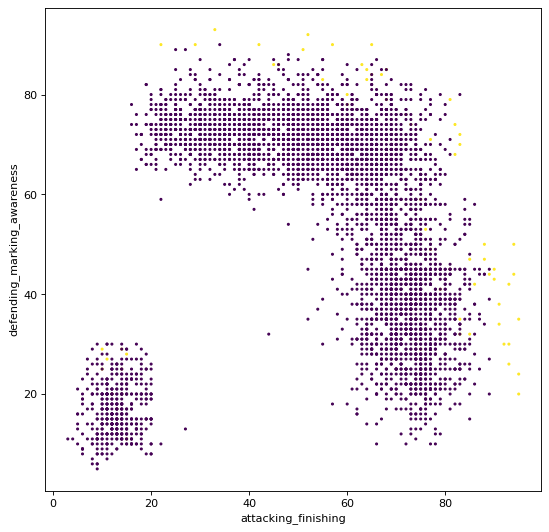

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[n1]
skill_2=skills_ratings[n2]

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

## 3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros

**Clustering-con-Kmeans**

Es necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 

In [ ]:
df_skills.isna().sum()

pace                            444
shooting                        444
passing                         444
dribbling                       444
defending                       444
physic                          444
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength                    0
power_long_shots                  0
mentality_aggression              0
mentality_interceptions     

En primer lugar, eliminamos las columnas con valores nulos, ya que el algoritmo de k-means no funciona con la presencia de estos valores. Ademas, descartamos variables que corresponden a cada posicion de la cancha, como por ejemplo goalkeeping, attacking y defending, quedandonos con aquellas que consideramos más importantes para tener menos cantidad de variables a la hora de utilizar los algoritmos de clustering.

In [ ]:
df_skills2= df_skills.drop(columns=['goalkeeping_speed','pace','shooting','passing','dribbling','defending','physic',
                                    'goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes', 'defending_standing_tackle', 
                                     'attacking_heading_accuracy',  'attacking_short_passing', 'attacking_volleys', 'movement_sprint_speed', 'movement_agility',
                                         'movement_reactions', 'mentality_interceptions', 'mentality_vision', 'mentality_penalties',
                                     'mentality_composure',
                                       'defending_sliding_tackle','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','power_shot_power', 'power_jumping','power_stamina'  ])

In [ ]:
df_skills2.columns

Index(['attacking_crossing', 'attacking_finishing', 'skill_dribbling',
       'movement_acceleration', 'movement_balance', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_positioning',
       'defending_marking_awareness', 'goalkeeping_diving'],
      dtype='object')

Procedemos a escalar el conjunto de datos

In [ ]:
def eleccion_cluster(X_train):
    inertia_eu = []
    silhouet_eu = []
    calinski_eu = []
    
    for n in tqdm(range(2, 15)):
        km = KMeans(n_clusters=n, random_state=42).fit(X_train) 
        inertia_eu.append(km.inertia_)
        silhouet_eu.append(silhouette_score(X_train, km.labels_,  metric='euclidean'))
        calinski_eu.append(calinski_harabasz_score(X_train, km.labels_))

    inertia_dtw = []
    silhouet_dtw = []
    calinski_dtw = []
    
    # for n in tqdm(range(2, 15)):
    #     km = KMeans(n_clusters=n, random_state=42).fit(X_train) 
    #     inertia_dtw.append(km.inertia_)
    #     silhouet_dtw.append(silhouette_score(X_train, km.labels_,  metric='euclidean'))
    #     calinski_dtw.append(calinski_harabasz_score(X_train, km.labels_))
    
    fig, axes = plt.subplots(3,2,figsize=(12,12))

    axes[0,0].plot(np.arange(2, 15), inertia_eu)
    axes[0,0].set_ylabel("Inertia")
    axes[0,0].set_title("Inertia of k-Means - Distancia Euclideana")
    
    # axes[0,1].plot(np.arange(2, 15), inertia_dtw)
    # axes[0,1].set_ylabel("Inertia")
    # axes[0,1].set_title("Inertia of k-Means - Distancia DTW")
    
    axes[1,0].plot(np.arange(2, 15), silhouet_eu)
    axes[1,0].set_ylabel("Silhouet")
    axes[1,0].set_title("Silhouet score - Distancia Euclideana")
    
    # axes[1,1].plot(np.arange(2, 15), silhouet_dtw)
    # axes[1,1].set_ylabel("Silhouet")
    # axes[1,1].set_title("Silhouet score - Distancia DTW")    
    
    axes[2,0].plot(np.arange(2, 15), calinski_eu)
    axes[2,0].set_xlabel('Number of clusters')
    axes[2,0].set_ylabel("Calinski")
    axes[2,0].set_title("Calinski harabasz Score - Distancia Euclideana")
    
    # axes[2,1].plot(np.arange(2, 15), calinski_dtw)
    # axes[2,1].set_xlabel('Number of clusters')
    # axes[2,1].set_ylabel("Calinski")
    # axes[2,1].set_title("Calinski harabasz Score- Distancia DTW")

100%|██████████| 13/13 [00:13<00:00,  1.06s/it]


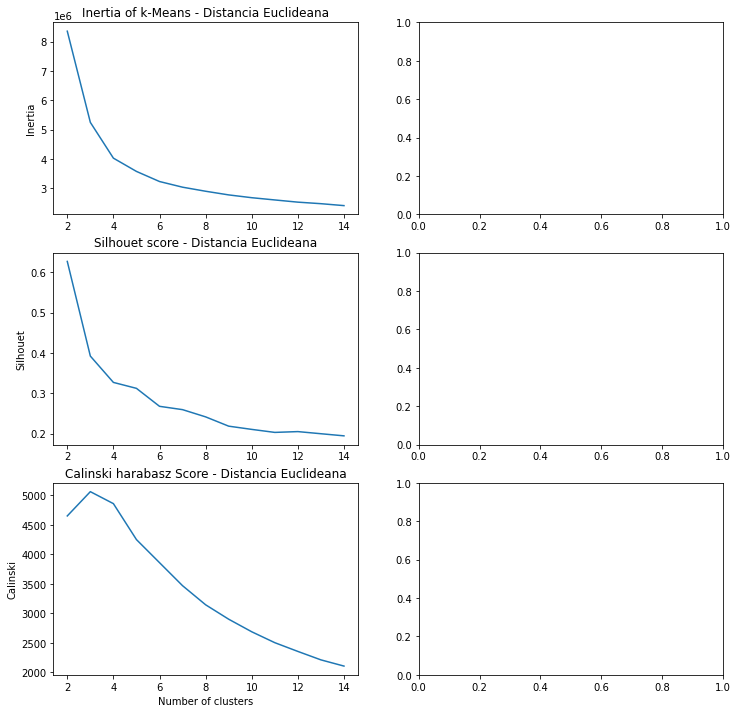

In [ ]:
eleccion_cluster(df_skills2)

In [ ]:
df_skills2.nunique()

attacking_crossing             88
attacking_finishing            93
skill_dribbling                89
movement_acceleration          79
movement_balance               77
power_strength                 68
power_long_shots               90
mentality_aggression           85
mentality_positioning          94
defending_marking_awareness    88
goalkeeping_diving             46
dtype: int64

8it [00:43,  5.39s/it]


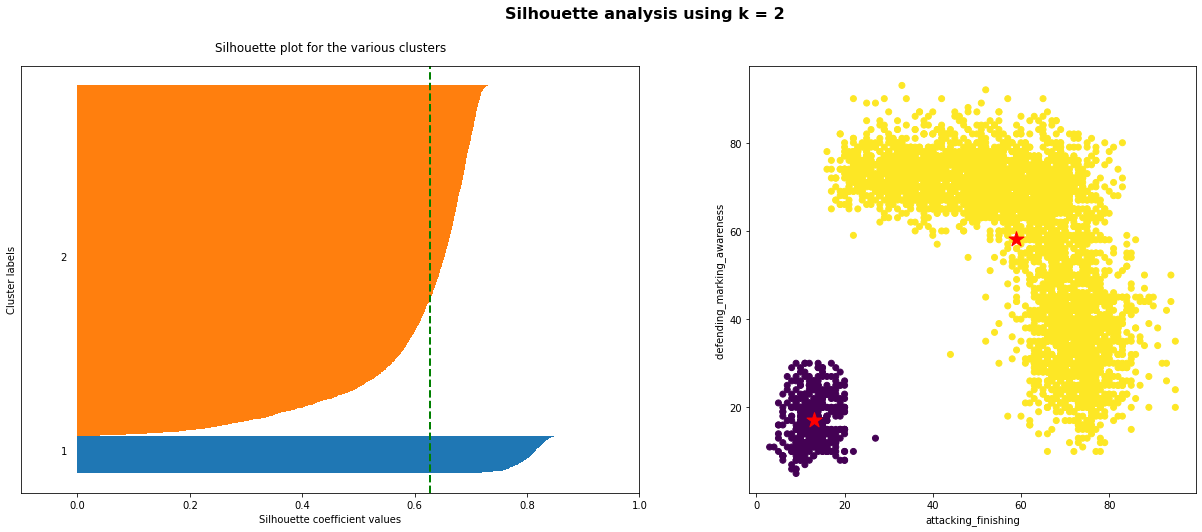

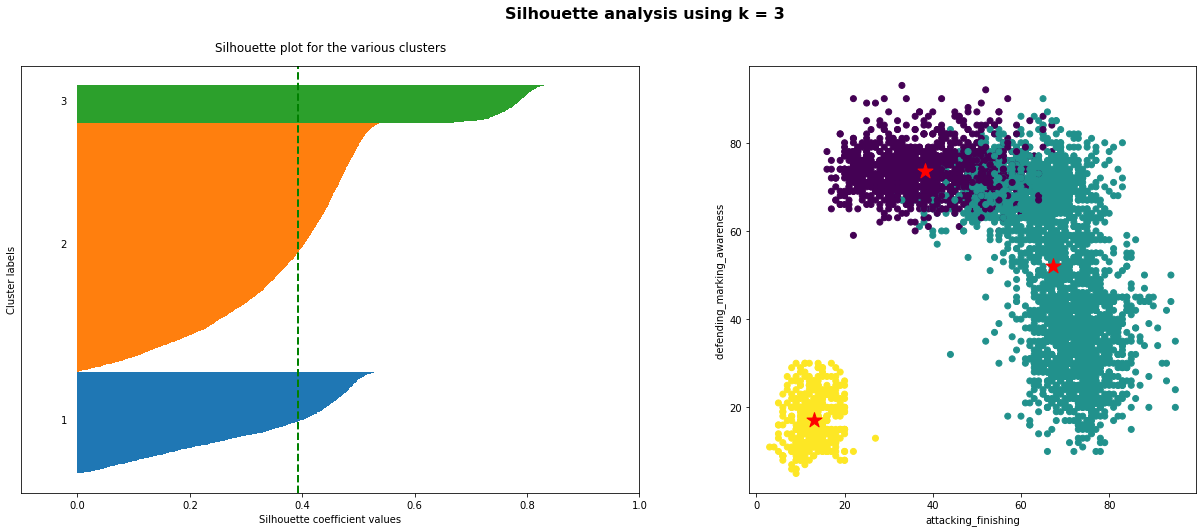

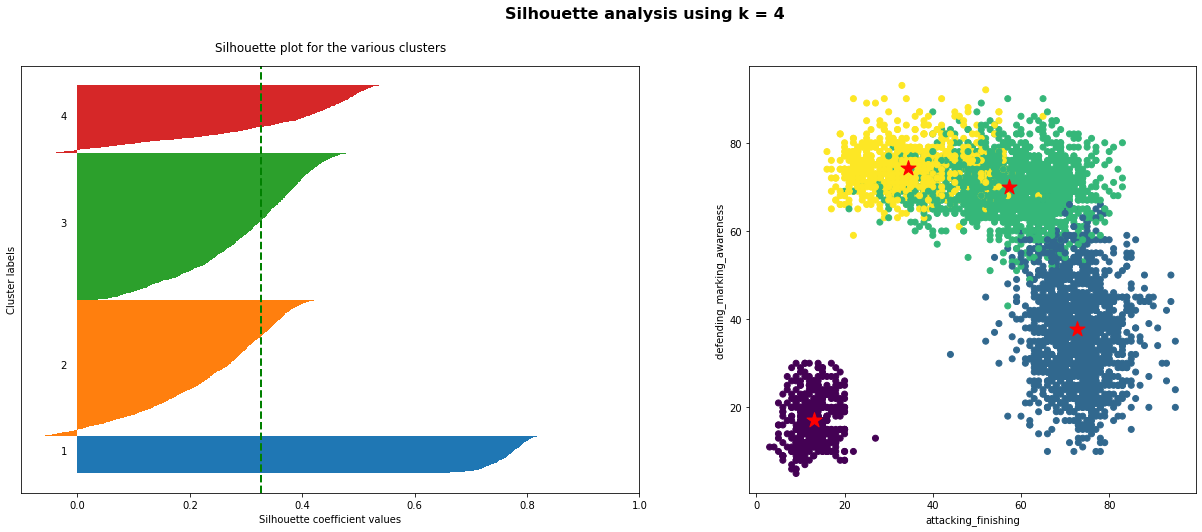

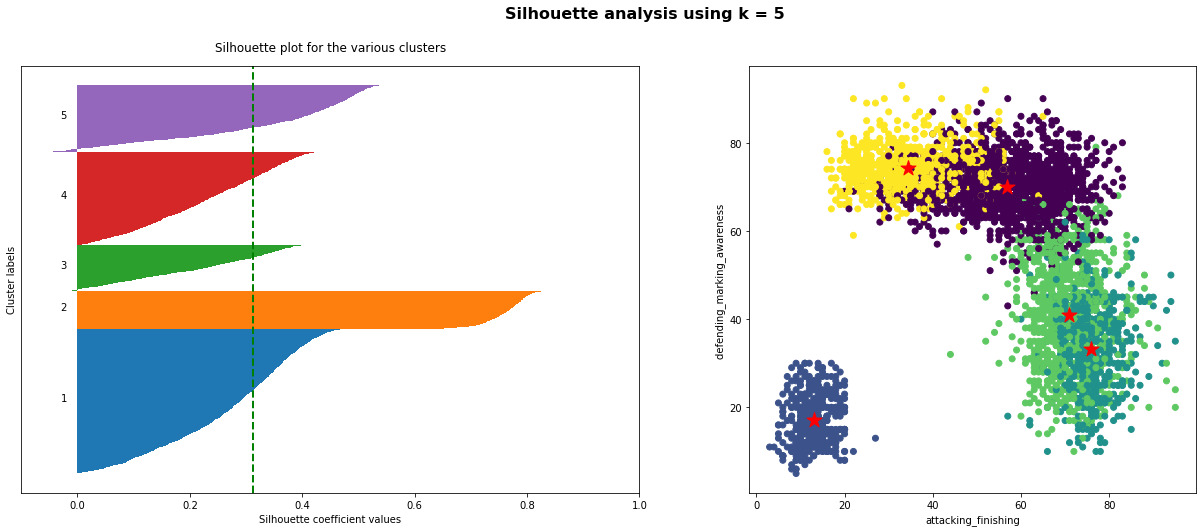

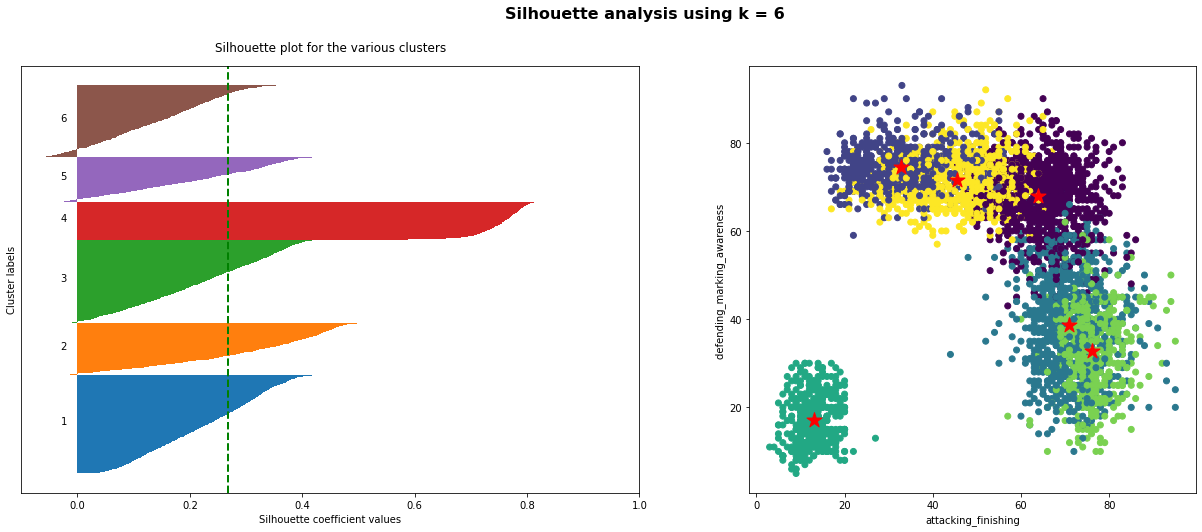

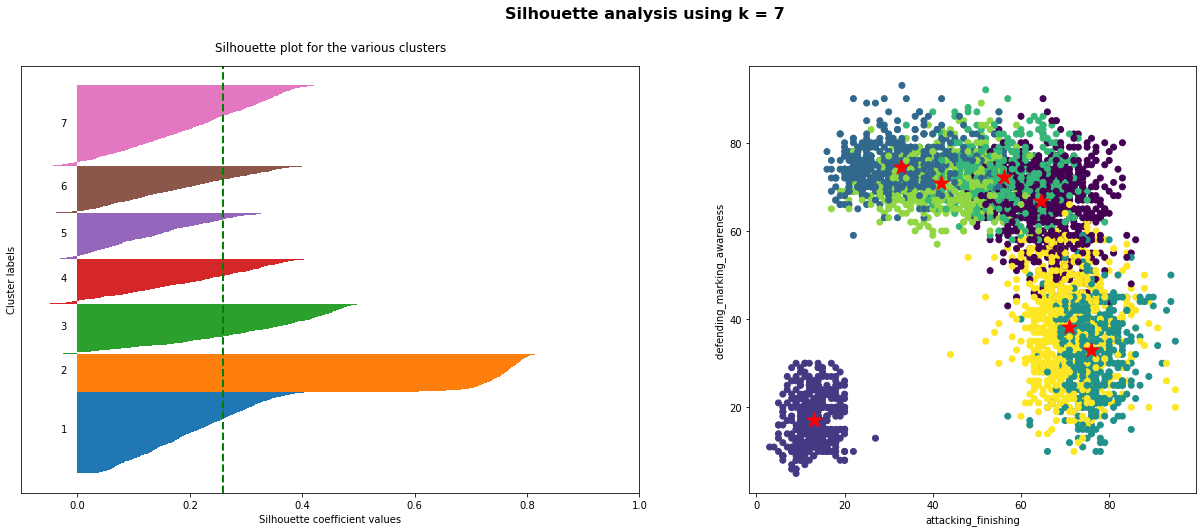

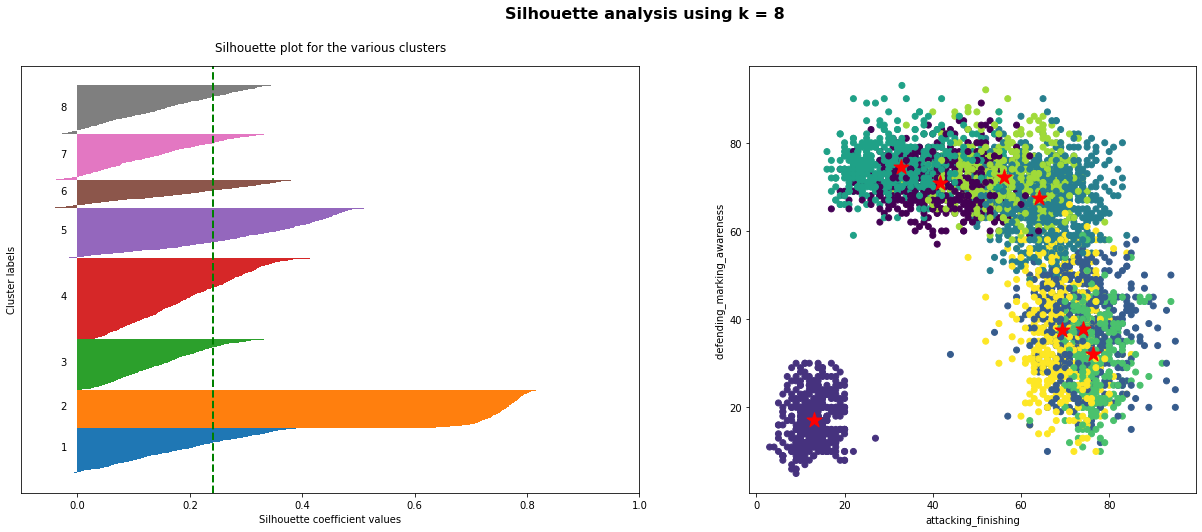

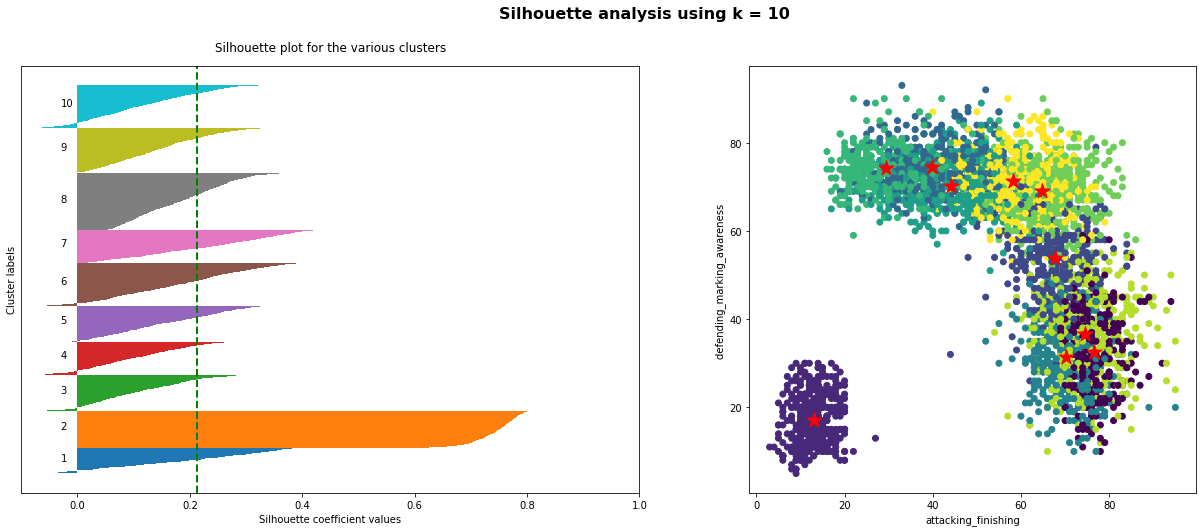

In [ ]:

# Aca ponen el Dataset con el que quieren trabajar
X_std = df_skills2.values
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [2, 3, 4, 5 ,6, 7,8, 10]

for i, k in tqdm(enumerate(lista_k)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 1], X_std[:, 9], c=labels)
    ax2.scatter(centroids[:, 1], centroids[:, 9], marker='*', c='r', s=250)
    #ax2.set_xlim([-12, 12])
    #ax2.set_xlim([-12, 12])
    ax2.set_xlabel('attacking_finishing')
    ax2.set_ylabel('defending_marking_awareness ')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);



Se decidió que el número de clusters buscados son 4. Observando la grafica anterior, podemos decir que para este número de clusters, los grupos no se mezclan tanto y los centroides se ven bien separados entre si.

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills2) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')


Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[n1]
skill_2=skills_ratings[n2]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

**Clustering Mean Shift**

La técnica de Mean Shift tiene como objetivo descubrir "manchas" en una densidad uniforme de muestras. Es un algoritmo basado en centroides, que funciona actualizando candidatos para centroides para que sean la media de los puntos dentro de una región determinada. Luego, estos candidatos se filtran en una etapa de posprocesamiento para eliminar casi duplicados para formar el conjunto final de centroides.

La siembra (seeding) se realiza mediante una técnica de agrupamiento para la escalabilidad.

Fuente: https://scikit-learn.org/stable/modules/clustering.html#mean-shift

In [ ]:
ms = MeanShift(bandwidth= 33, bin_seeding=True)

ms.fit(df_skills2)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [ ]:
df_clusters2=df_n.copy()
df_clusters2['Mean_shift'] = ms.labels_ #clusters

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[n1]
skill_2=skills_ratings[n2]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills2[skill_1], 
                                y=df_skills2[skill_2], 
                                mode='markers', 
                                text=df_n.loc[:,'short_name'], 
                                marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

## 4- Evaluación y Análisis de los clusters encontrados

### Clusters Kmeans

**Cantidad de observaciones por Cluster**

In [ ]:
df_clusters.kmeans_4.value_counts()

0    1739
3    1612
2     798
1     444
Name: kmeans_4, dtype: int64

**Exploramos que posiciones componen cada cluster.**

El cluster 0 (puntos azules) esta compuesto en su mayoria por delanteros, y en menor medida por mediocampistas y defensores.

In [ ]:
df_clusters[df_clusters["kmeans_4"]==0].first_position.value_counts()

CM     450
CDM    364
RB     295
LB     289
CB     106
CAM     58
RM      45
LWB     40
RWB     37
LM      36
RW      10
LW       6
ST       3
Name: first_position, dtype: int64

El cluster 1 (puntos verdes) esta compuesto en su mayoria por defensores, y en menor medida por mediocampistas.

In [ ]:
df_clusters[df_clusters["kmeans_4"]==1].first_position.value_counts()

GK    444
Name: first_position, dtype: int64

El cluster 2 (puntos amarillos) esta compuesto en su totalidad por los arqueros.

In [ ]:
df_clusters[df_clusters["kmeans_4"]==2].first_position.unique()

array(['CB', 'CDM', 'RB', 'LB', 'RWB', 'CM'], dtype=object)

El cluster 3 (puntos rojos) esta compuesto en su mayoria por mediocampistas, y en menor medida por delanteros y defensores.

In [ ]:
df_clusters[df_clusters["kmeans_4"]==3].first_position.value_counts()

ST     620
CAM    274
LM     214
RM     202
RW     105
LW      91
CF      56
CM      48
LB       1
RB       1
Name: first_position, dtype: int64

### Clusters Mean Shift

**Cantidad de observaciones por Cluster**

In [ ]:
df_clusters2.Mean_shift.value_counts()

0    3256
1     893
2     444
Name: Mean_shift, dtype: int64

Exploramos que posiciones componen cada cluster.

El cluster 0 (puntos azules en el gráfico) encontrado por el algoritmo de Mean_shift esta conformado por jugadores de todos los puestos (defensores, mediocampistas y delanteros), exceptuando a los arqueros. Cabe destacar que para el caso de los mediocampistas y defensores, este grupo está conformado por jugadores de características ofensivas (laterales, carrileros y mediocampistas ofensivos). 

In [ ]:
df_clusters2[df_clusters2["Mean_shift"]==0].first_position.value_counts()

ST     623
CM     498
CDM    337
CAM    332
LB     271
RB     270
LM     250
RM     247
RW     115
LW      97
CB      86
CF      56
LWB     38
RWB     36
Name: first_position, dtype: int64

El cluster 1 (puntos amarillos) esta integrado por mediocampistas y defensores. A diferencia del cluster 0, los jugadores que conforman este grupo son aquellos cuyas características son más defensivas (defensores centrales y mediocampistas de contensión).

In [ ]:
df_clusters2[df_clusters2["Mean_shift"]==1].first_position.value_counts()

CB     694
CDM    108
RB      50
LB      34
RWB      4
LWB      2
CM       1
Name: first_position, dtype: int64

El cluster 2 (puntos rojos) esta compuesto en su totalidad por los arqueros. Notar que aplicando ambos métodos (K_means y Mean_shift), se diferencian claramente los arqueros de los jugadores de campo.

In [ ]:
df_clusters2[df_clusters2["Mean_shift"]==2].first_position.value_counts()

GK    444
Name: first_position, dtype: int64

##5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

No se realizó ninguna normalización ni escalado de datos debido a que todas las variables utilizadas para realizar el clustering tienen la misma escala: un rango de 0 a 100. El escalado se realiza cuando se trabaja con algoritmos que funcionan utilizando distancias, debido a que si se tienen variables con distintas escalas estos algoritmos se ven más afectados por las variables con escalas mayores. En este caso no se escaló porque no iba a afectar el desempeño del algoritmo, pero sí se podría hacer sin afectar los resultados.

##6- Embeddings y técnicas de clustering

 **t-SNE**


t-SNE es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas y trata de minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
#ingresamos las librerias correspondientes
from sklearn import manifold

In [ ]:
df_skills2.shape #dimensiones del dataset

(4593, 11)

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']
def pos2(position):
    if position in forwards:
        return 'Forward'
    elif position in midfielders:
        return 'Midfielder'
    elif position in defenders:
        return 'Defender'
    elif position in goalkeepers:
        return 'goalkeepers'    
    
df_n["club_position2"]=df_n["club_position"].apply(lambda x: pos2(x))
df_n_dropped = df_n.copy()
df_n_dropped["club_position2"].value_counts()
df_embedd = df_skills2.loc[df_n_dropped.index]

In [ ]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
df_tsne = tsne.fit_transform(df_embedd)
df_tsne.shape

(4593, 2)

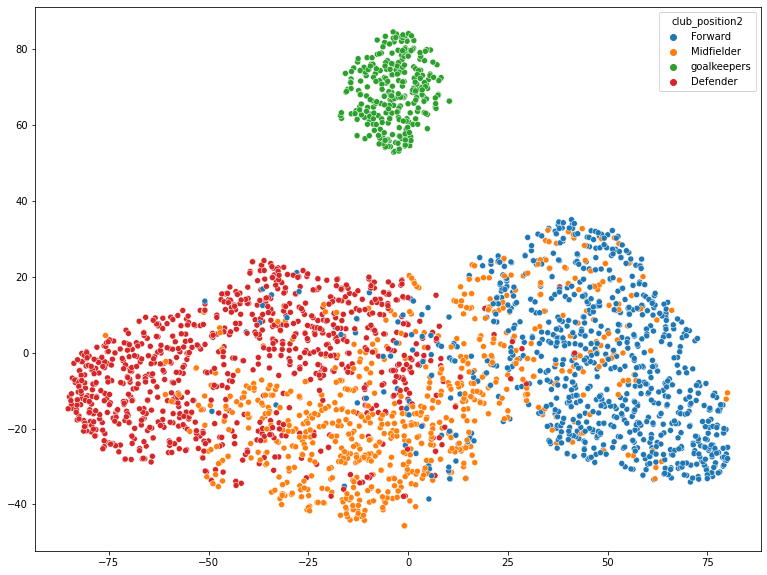

In [ ]:
plt.subplots(figsize=(13,10))
sns.scatterplot(x=df_tsne[:,0], y=df_tsne[:,1], hue=df_n_dropped['club_position2'])

In [ ]:
df_tsne
df_tsne=pd.DataFrame(df_tsne, columns=['tsne_1','tsne_2'])

In [ ]:
df_tsne["clusters_kmeans"]=clusters

In [ ]:
df_tsne["clusters_mean_shift"]=clusters2

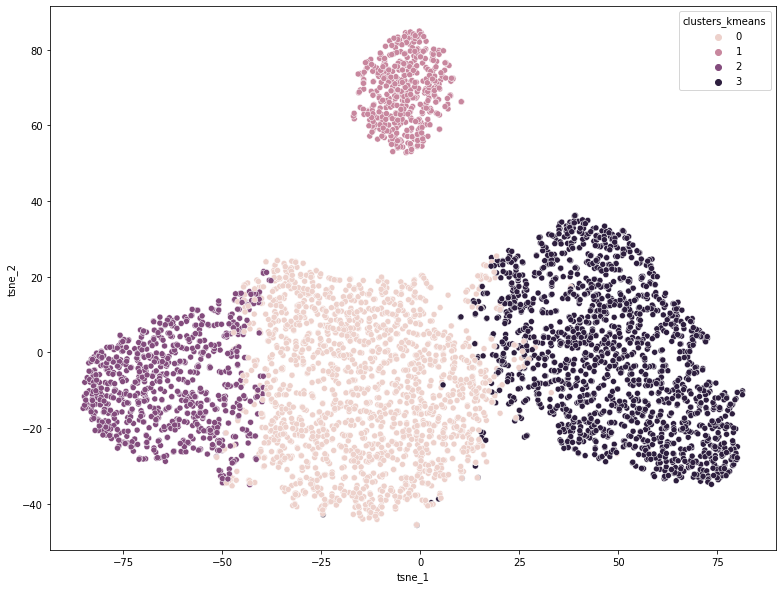

In [ ]:
plt.subplots(figsize=(13,10))
sns.scatterplot(x=df_tsne.iloc[:,0], y=df_tsne.iloc[:,1], hue=df_tsne['clusters_kmeans'])

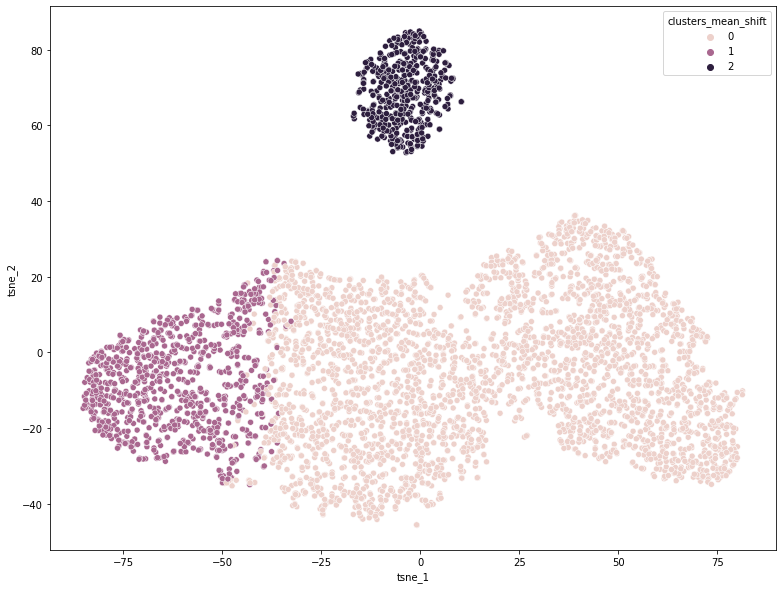

In [ ]:
plt.subplots(figsize=(13,10))
sns.scatterplot(x=df_tsne.iloc[:,0], y=df_tsne.iloc[:,1], hue=df_tsne['clusters_mean_shift'])

Podemos ver que al aplicar un embedding con tsne y visualizarlos junto con los  clusters generados por los algoritmos de K_means y Mean_shift, estos se diferencian de forma clara y correlacionada con las posiciones de los jugadores en el campo de juego.